<a href="https://colab.research.google.com/github/abhisheshgupta/abhisheshgupta/blob/main/Steller_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####load tha data

In [ ]:
#importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/stellar-classification-dataset-sdss17.zip')

##Exploratory Data Analysis

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.shape

(100000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


####histogram

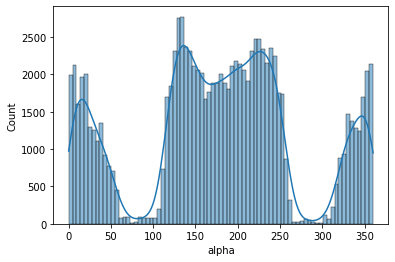

In [ ]:
sns.histplot(df['alpha'],kde=True)

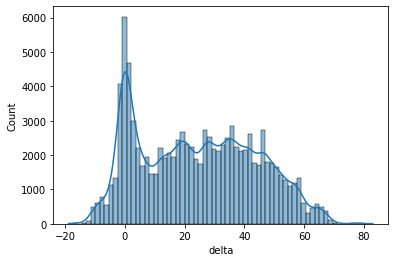

In [ ]:
sns.histplot(df['delta'],kde=True)

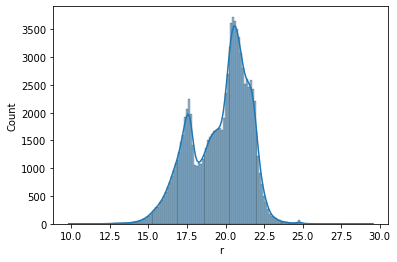

In [ ]:
sns.histplot(df['r'],kde=True)

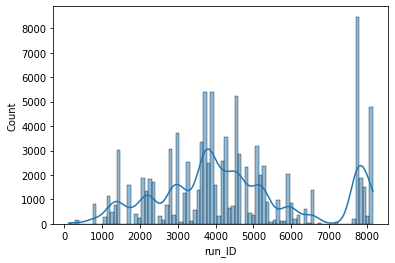

In [ ]:
sns.histplot(df['run_ID'],kde=True)

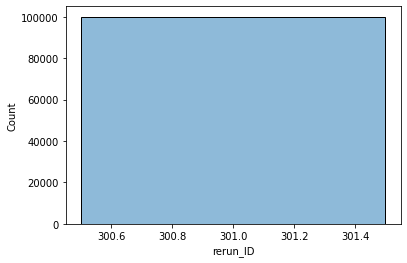

In [ ]:
sns.histplot(df['rerun_ID'],kde=True)

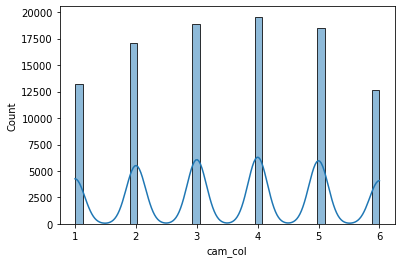

In [ ]:
sns.histplot(df['cam_col'],kde=True)

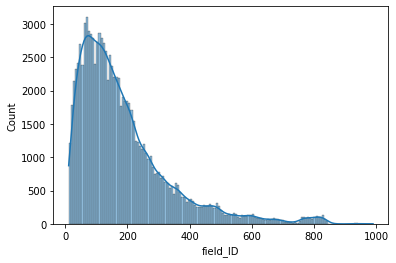

In [ ]:
sns.histplot(df['field_ID'],kde=True)

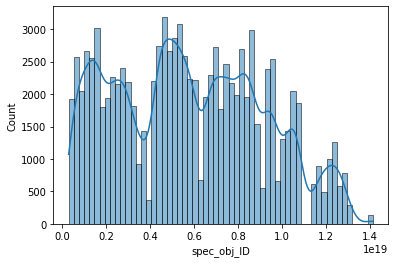

In [ ]:
sns.histplot(df['spec_obj_ID'],kde=True)

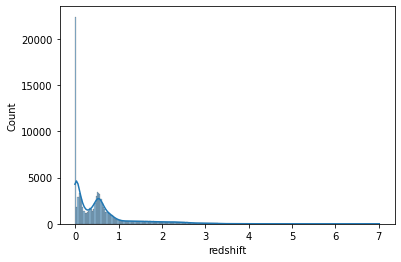

In [ ]:
sns.histplot(df['redshift'],kde=True)

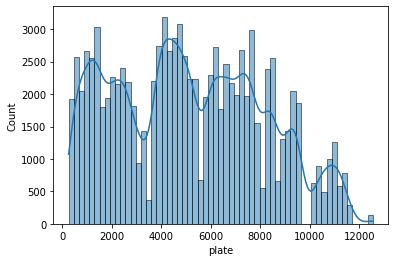

In [ ]:
sns.histplot(df['plate'],kde=True)

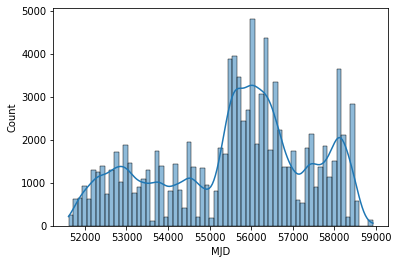

In [ ]:
sns.histplot(df['MJD'],kde=True)

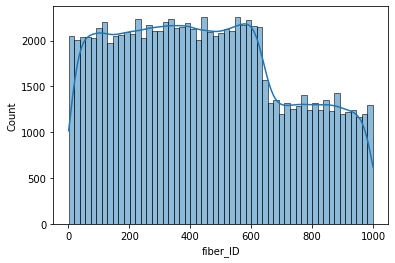

In [ ]:
sns.histplot(df['fiber_ID'],kde=True)

##Faeture Engineering

####missing values

In [ ]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

###outlier detection

####boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


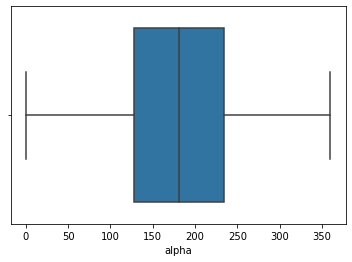

In [ ]:
sns.boxplot(df['alpha'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


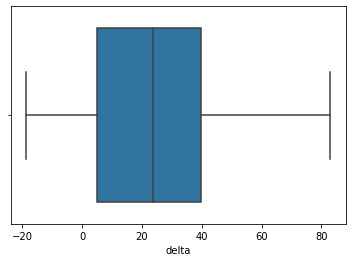

In [ ]:
sns.boxplot(df['delta'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


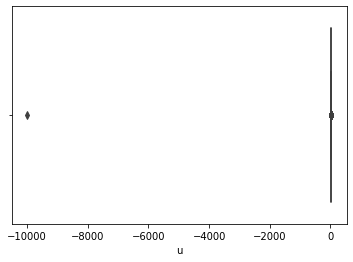

In [ ]:
sns.boxplot(df['u'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


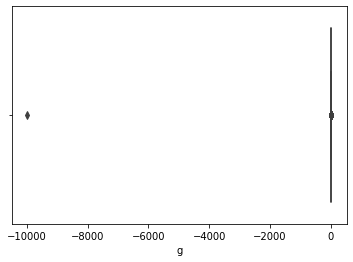

In [ ]:
sns.boxplot(df['g'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


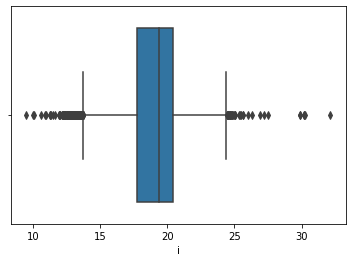

In [ ]:
sns.boxplot(df['i'])

####iqr method

In [ ]:
q1 = np.percentile(df['u'],25)
q3 = np.percentile(df['u'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['u']>=upper]
lc = df[df['u']<=lower]
df = df[df['u']<upper]
df = df[df['u']>lower]

In [ ]:
df.shape

(99944, 18)

In [ ]:
q1 = np.percentile(df['g'],25)
q3 = np.percentile(df['g'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['g']>=upper]
lc = df[df['g']<=lower]
df = df[df['g']<upper]
df = df[df['g']>lower]

In [ ]:
df.shape

(99880, 18)

In [ ]:
q1 = np.percentile(df['r'],25)
q3 = np.percentile(df['r'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['r']>=upper]
lc = df[df['r']<=lower]
df = df[df['r']<upper]
df = df[df['r']>lower]

In [ ]:
df.shape

(99824, 18)

In [ ]:
q1 = np.percentile(df['i'],25)
q3 = np.percentile(df['i'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['i']>=upper]
lc = df[df['i']<=lower]
df = df[df['i']<upper]
df = df[df['i']>lower]

In [ ]:
df.shape

(99738, 18)

In [ ]:
q1 = np.percentile(df['z'],25)
q3 = np.percentile(df['z'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['z']>=upper]
lc = df[df['z']<=lower]
df = df[df['z']<upper]
df = df[df['z']>lower]

In [ ]:
df.shape

(99592, 18)

In [ ]:
q1 = np.percentile(df['run_ID'],25)
q3 = np.percentile(df['run_ID'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['run_ID']>=upper]
lc = df[df['run_ID']<=lower]
df = df[df['run_ID']<upper]
df = df[df['run_ID']>lower]

In [ ]:
df.shape

(99592, 18)

In [ ]:
q1 = np.percentile(df['field_ID'],25)
q3 = np.percentile(df['field_ID'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['field_ID']>=upper]
lc = df[df['field_ID']<=lower]
df = df[df['field_ID']<upper]
df = df[df['field_ID']>lower]

In [ ]:
df.shape

(94214, 18)

In [ ]:
q1 = np.percentile(df['redshift'],25)
q3 = np.percentile(df['redshift'],75)
iqr = q3-q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
uc = df[df['redshift']>=upper]
lc = df[df['redshift']<=lower]
df = df[df['redshift']<upper]
df = df[df['redshift']>lower]

In [ ]:
df.shape

(85734, 18)

####boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


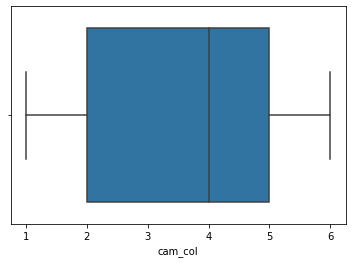

In [ ]:
sns.boxplot(df['cam_col'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


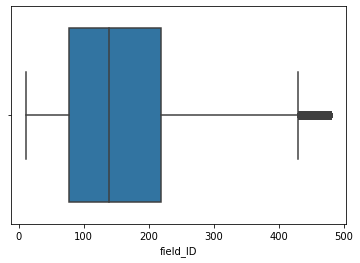

In [ ]:
sns.boxplot(df['field_ID'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


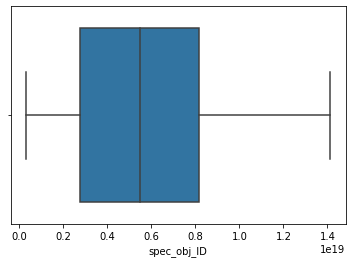

In [ ]:
sns.boxplot(df['spec_obj_ID'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


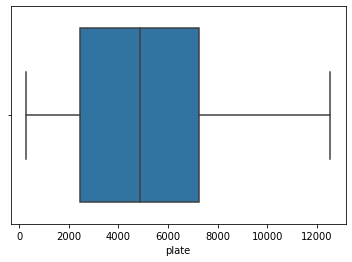

In [ ]:
sns.boxplot(df['plate'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


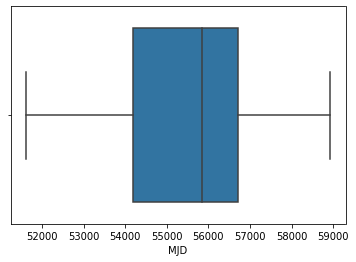

In [ ]:
sns.boxplot(df['MJD'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


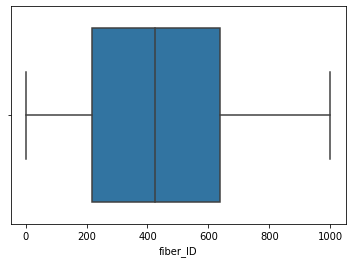

In [ ]:
sns.boxplot(df['fiber_ID'])

####correlation

In [ ]:
df.corr()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,0.018113,-0.300465,0.141574,0.157854,0.159735,0.154183,0.145715,1.000000,NaN,-0.035673,0.030545,0.249939,0.107252,0.249939,0.278310,0.074306
alpha,0.018113,1.000000,0.103900,0.002007,-0.013203,-0.023943,-0.026766,-0.029374,0.018111,NaN,0.025045,-0.109676,-0.019436,-0.019589,-0.019437,-0.001150,0.034140
delta,-0.300465,0.103900,1.000000,-0.024394,-0.010537,-0.016242,-0.016271,-0.018863,-0.300467,NaN,0.035473,-0.067263,0.085154,0.026240,0.085154,0.075112,0.032569
u,0.141574,0.002007,-0.024394,1.000000,0.859095,0.750336,0.647516,0.573697,0.141572,NaN,0.011287,-0.007595,0.433269,0.324447,0.433267,0.472689,0.196867
g,0.157854,-0.013203,-0.010537,0.859095,1.000000,0.942398,0.864196,0.791438,0.157852,NaN,0.012776,-0.003387,0.609490,0.518379,0.609489,0.634575,0.230686
r,0.159735,-0.023943,-0.016242,0.750336,0.942398,1.000000,0.967627,0.922126,0.159733,NaN,0.013649,-0.000769,0.670837,0.564001,0.670836,0.684585,0.228641
i,0.154183,-0.026766,-0.016271,0.647516,0.864196,0.967627,1.000000,0.973126,0.154181,NaN,0.012011,0.000442,0.678921,0.571379,0.678920,0.686886,0.218469
z,0.145715,-0.029374,-0.018863,0.573697,0.791438,0.922126,0.973126,1.000000,0.145713,NaN,0.010772,0.001724,0.657847,0.558977,0.657846,0.664784,0.206660
run_ID,1.000000,0.018111,-0.300467,0.141572,0.157852,0.159733,0.154181,0.145713,1.000000,NaN,-0.035774,0.030545,0.249938,0.107251,0.249938,0.278308,0.074293
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Model Training

In [ ]:
x = df.drop(columns='class')
y = df['class']

In [ ]:
x.shape,y.shape

((85734, 17), (85734,))

#####label encoding

In [ ]:
label = {'GALAXY':0,'STAR':1,'QSO':2}

In [ ]:
y = y.map(label)

In [ ]:
y.value_counts()

0    55585
1    20408
2     9741
Name: class, dtype: int64

####split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((64300, 17), (21434, 17))

####scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.fit_transform(x_test)

In [ ]:
y_train.shape,y_test.shape

((64300,), (21434,))

#####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_r = LogisticRegression(max_iter=200)

In [ ]:
log_r.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
log_r.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = log_r.predict(x_test)

In [ ]:
y_pred

array([1, 0, 1, ..., 0, 0, 0])

#####r2_score

In [ ]:
log_r.score(x_train,y_train)

0.9564074650077761

In [ ]:
log_r.score(x_test,y_test)

0.9582439115424093

#####confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[13504,   170,   191],
       [    0,  5117,     1],
       [  531,     2,  1918]])

#####decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc_y_pred = dtc.predict(x_test)

#####r2_score

In [ ]:
dtc.score(x_train,y_train)

1.0

In [ ]:
dtc.score(x_test,y_test)

0.9355230008397872

#####svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
svc_y_pred = svc.predict(x_test)

#####r2_score

In [ ]:
svc.score(x_train,y_train)

0.9641368584758943

In [ ]:
svc.score(x_test,y_test)

0.963329289913222